In [1]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel('Продажи дисков.xlsx')

In [7]:
data.set_index('date', inplace=True)

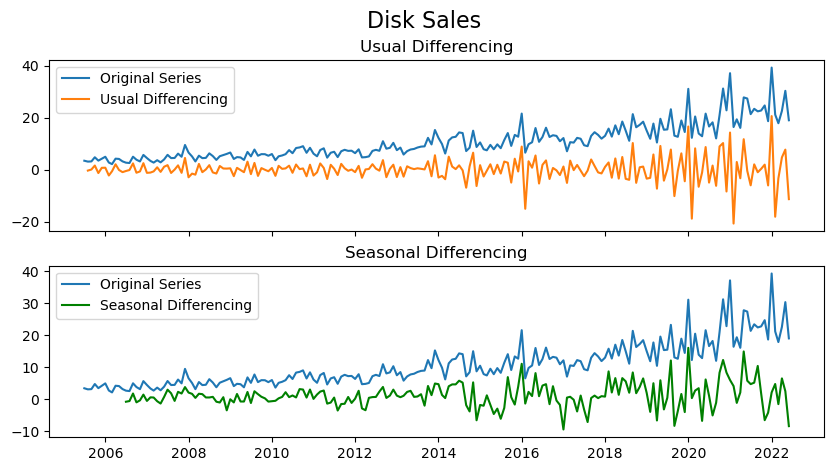

In [8]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Disk Sales', fontsize=16)
plt.show()

In [9]:
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=1010.126, Time=2.06 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1069.602, Time=0.07 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1038.741, Time=0.52 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1028.572, Time=0.34 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1086.508, Time=0.05 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=1065.992, Time=0.22 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=1012.063, Time=1.81 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=1012.056, Time=3.65 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=1031.886, Time=0.84 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=1013.805, Time=8.95 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=1027.647, Time=0.37 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=1010.659, Time=2.67 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=1010.585, Time=1.52 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=1029.634, Time=0.72 sec
 ARIMA(0,0,2)(0,1,1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  204
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -500.063
Date:                            Thu, 30 Nov 2023   AIC                           1010.126
Time:                                    17:09:48   BIC                           1026.413
Sample:                                07-01-2005   HQIC                          1016.722
                                     - 06-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0235      0.036      0.644      0.520      -0.048       0.095
ar.L1          0.9817      0.030     32.483      0.000       0.922       1.041
ma.L1         -0.8845      0.059    -15.037      0.000      -1.000      -0.769
ma.S.L12      -0.6943      0.047    -14.660      0.000      -0.787      -0.601
sigma2        10.3032      0.766     13.443      0.000       8.801      11.805
===================================================================================
Ljung-Box (L1) (Q):                   0.93   Jarque-Bera (JB):               133.53
Prob(Q):                              0.33   Prob(JB):                         0.00
Heteroskedasticity (H):              12.29   Skew:                             1.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

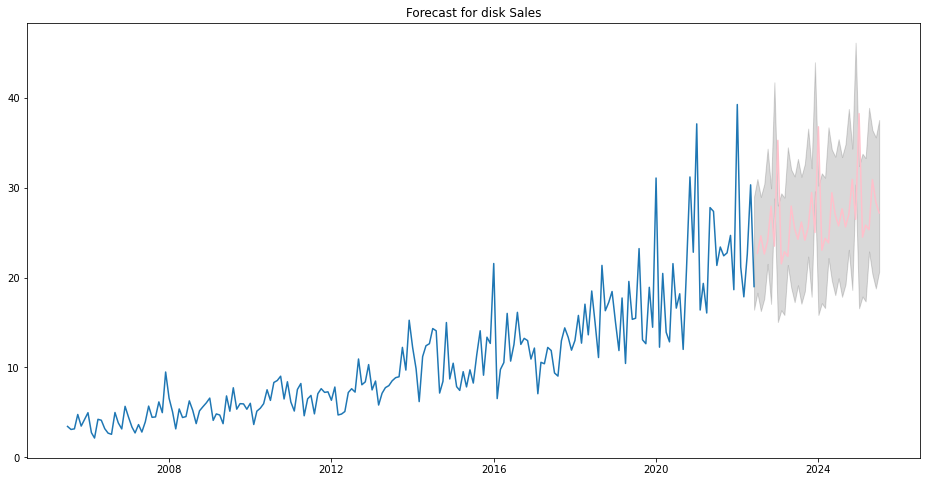

In [17]:
# Forecast
plt.figure(figsize=(16, 8))
n_periods = 38
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='pink')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Forecast for disk Sales")

plt.show()

In [ ]:
########################################################

In [43]:
df=pd.read_excel('Sales.xlsx')

In [44]:
df.set_index('date', inplace=True)

In [63]:
import pmdarima as pm

smodel = pm.auto_arima(df, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=False,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,1,1)[12]             : AIC=438.416, Time=0.12 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=453.801, Time=0.02 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=442.978, Time=0.13 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=440.607, Time=0.09 sec
 ARIMA(1,2,1)(0,1,0)[12]             : AIC=437.070, Time=0.05 sec
 ARIMA(1,2,1)(1,1,0)[12]             : AIC=438.833, Time=0.14 sec
 ARIMA(1,2,1)(1,1,1)[12]             : AIC=440.399, Time=0.20 sec
 ARIMA(0,2,1)(0,1,0)[12]             : AIC=438.614, Time=0.06 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=441.041, Time=0.03 sec
 ARIMA(2,2,1)(0,1,0)[12]             : AIC=438.017, Time=0.10 sec
 ARIMA(1,2,2)(0,1,0)[12]             : AIC=436.582, Time=0.13 sec
 ARIMA(1,2,2)(1,1,0)[12]             : AIC=438.229, Time=0.21 sec
 ARIMA(1,2,2)(0,1,1)[12]             : AIC=437.472, Time=0.28 sec
 ARIMA(1,2,2)(1,1,1)[12]             : AIC=439.328, Time=0.31 sec
 ARIMA(0,2,2)(0,1,0)[12]         

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   31
Model:             SARIMAX(1, 2, 2)x(0, 1, [], 12)   Log Likelihood                -214.291
Date:                             Thu, 30 Nov 2023   AIC                            436.582
Time:                                     18:45:16   BIC                            439.914
Sample:                                 11-01-2019   HQIC                           436.913
                                      - 05-01-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8916      0.214     -4.159      0.000      -1.312      -0.471
ma.L1         -0.3020      0.485     -0.623      0.534      -1.253       0.649
ma.L2         -0.6607      0.446     -1.483      0.138      -1.534       0.213
sigma2      5.223e+09   8.69e-11   6.01e+19      0.000    5.22e+09    5.22e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.28
Prob(Q):                              0.91   Prob(JB):                         0.87
Heteroskedasticity (H):               0.30   Skew:                            -0.10
Prob(H) (two-sided):                  0.17   Kurtosis:                         3.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.78e+35. Standard errors may be unstable.
"""

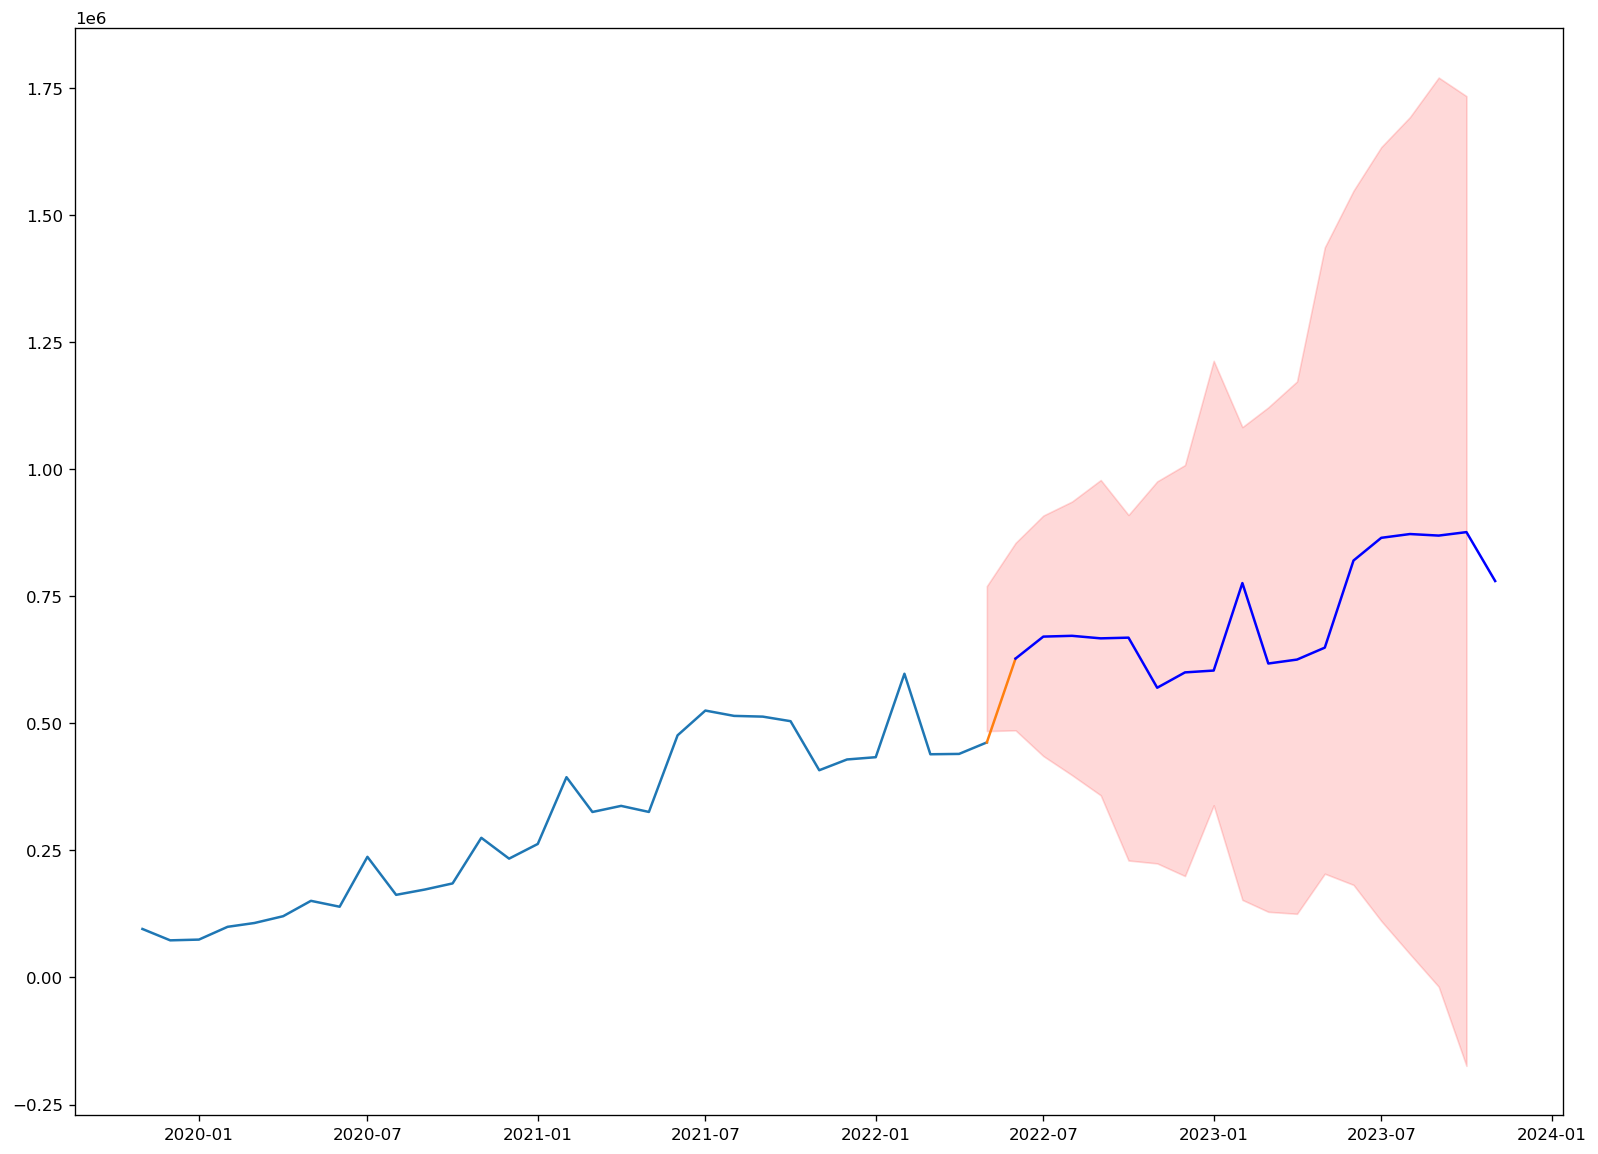

In [89]:
# Set the graph size before plotting
plt.figure(figsize=(16, 12))

# Plot the data
plt.plot(df)
plt.plot([df.index[-1], fitted.index[0]], [df.iloc[-1], fitted[0]])
plt.plot(fitted, color='blue', alpha=1)

# Fill the confidence interval
plt.fill_between(lower_series.index, lower_series, upper_series, color='red', alpha=.15)

# Show the plot
plt.show()